# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | First Name | Last Name | Signature | Hours | Contribution |
| Member 2: | Saba | Shabnam | Saba Shabnam | 5 | 25% |
| Member 3: | Kamsiyochukwu | Nnodu | Kamsy Nnodu | 5 | 25% |
| Member 4: | Christopher | Roberts | Christopher Roberts | 5 | 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

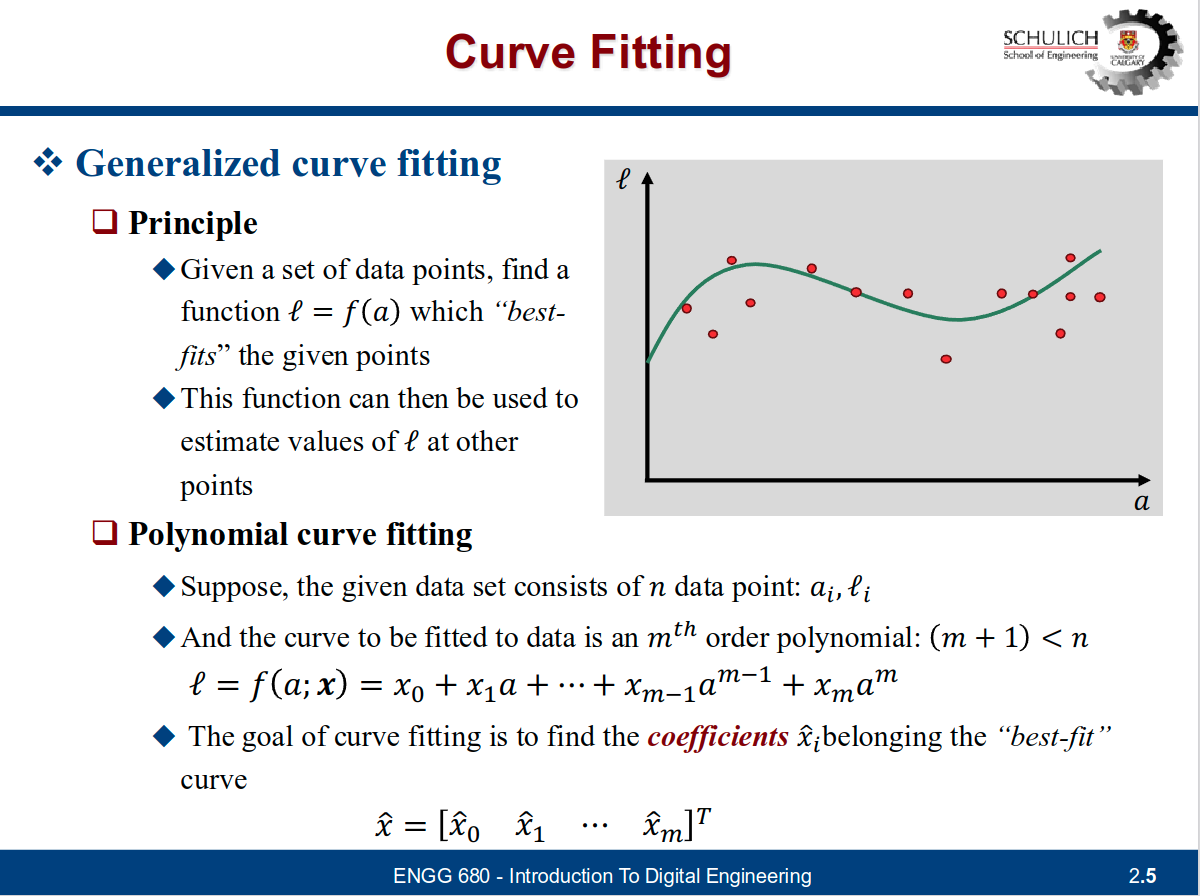

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [79]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [80]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)

df_data =pd.read_excel('./data.xlsx') #Loading data.xlsx file
arr_data = df_data.to_numpy() #converting to numpy array
#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)

l = np.array(df_data['l'])  # Noisy observations
l_var = np.array(df_data['l_var']) # Variance of observations
l_true = l_true = np.array(df_data['l_true'])  # True observations

In [81]:
# step 3
# define the number of observation n
# (1 mark)
 # Number of observations in the array
n = len(l) 
print(n)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n) #observation weight matrix P for LSE as identity matrix

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


500


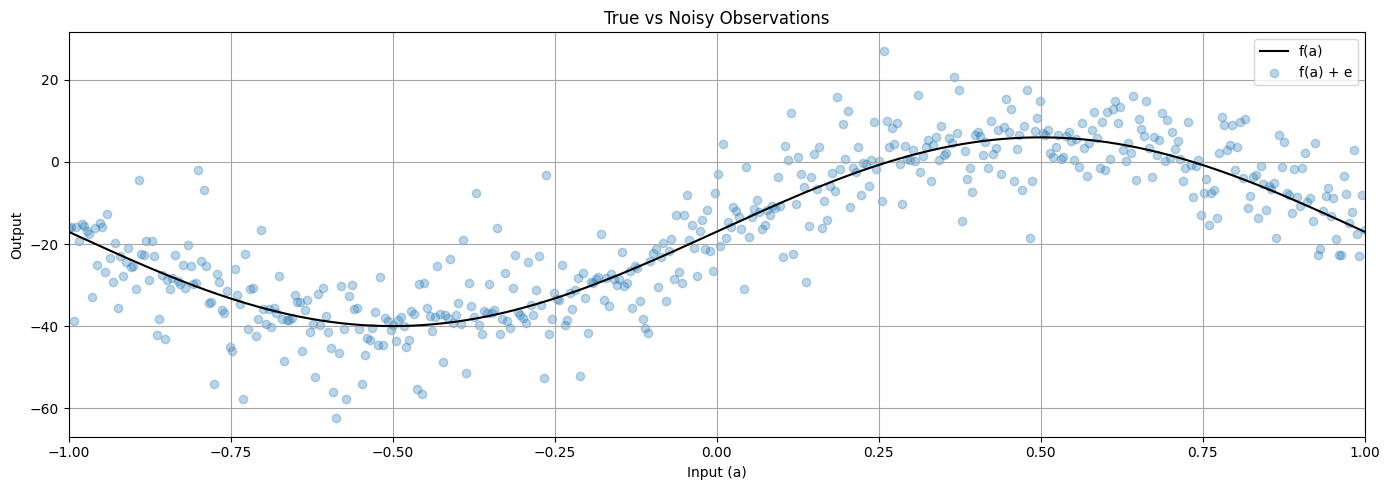

In [82]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.plot(np.linspace(-1, 1, len(l_true)), l_true, label='f(a)', color='k')  # Line plot for true observations
ax.scatter(np.linspace(-1, 1, len(l)), l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)  # Scatter plot for noisy observations
## Adding labels, title, and legend
ax.set_xlabel('Input (a)')
ax.set_ylabel('Output')
ax.set_title('True vs Noisy Observations')
ax.grid(True, which='both', ls='-', color='0.65') #adding grid
ax.set_xlim([-1, 1])
ax.legend()
fig.tight_layout()
plt.show()

In [83]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''
    try:
        # Construct the Vandermonde matrix (A)
        A = np.vander(a, deg + 1, increasing=True)  #  matrix A  for polynomial fitting

        # Solve the weighted normal equation A.T @ P @ A @ x = A.T @ P @ l
        AtPA = A.T @ P @ A  
        AtPl = A.T @ P @ l  

        # Solve for x (the polynomial coefficients)
        x = np.linalg.solve(AtPA, AtPl)  # Solving the equation for x

        # Compute the observation residuals
        v = l - A @ x  # Observation residuals: actual - predicted

        # Compute the a posteriori variance factor (APV)
        n = len(l)  # Observation numbers
        apv = (v.T @ P @ v) / (n - deg - 1)  # Variance factor, accounting for the degree of freedom where (n-m)=n-deg-1

        # Calculate the covariance matrix of the coefficients
        cov_x = apv * np.linalg.inv(AtPA)  # Covariance matrix of the estimated coefficients

        return x, cov_x, apv, v
    except np.linalg.LinAlgError as e:
        print("An error occurred in matrix operations:", e)
        return None


In [84]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
# Call the fit_polynomial_curve function for polynomial degrees 1, 3, and 5
polynomial_degree_1 = fit_polynomial_curve(a, l, P, 1)
polynomial_degree_3 = fit_polynomial_curve(a, l, P, 3)
polynomial_degree_5 = fit_polynomial_curve(a, l, P, 5)

# Display the coefficients of the fitted polynomials directly
print("Polynomial Degree 1 Coefficients:", polynomial_degree_1)  # Display only coefficients
print("Polynomial Degree 3 Coefficients:", polynomial_degree_3)
print("Polynomial Degree 5 Coefficients:", polynomial_degree_5)



Polynomial Degree 1 Coefficients: (array([-16.59352348,   7.25633807]), array([[3.25485217e-01, 1.12027794e-17],
       [1.12027794e-17, 9.85406897e-02]]), np.float64(162.742608604322), array([ 2.31950929e+01,  2.33624696e+01,  5.16650752e-01,  2.33475847e+01,
        1.96698387e+01,  2.37681600e+01,  2.33453696e+01,  2.18331528e+01,
        2.11355408e+01,  5.61358715e+00,  2.24756392e+01,  1.33407067e+01,
        2.34014210e+01,  2.24034178e+01,  1.13532794e+01,  2.53650032e+01,
        1.44202357e+01,  8.52085442e+00,  1.79247562e+01,  2.11851700e+00,
        1.46072683e+01,  9.70673172e+00,  1.30817824e+01,  1.63166651e+01,
        1.15688083e+01,  1.16383392e+01,  6.07754648e+00,  3.24693889e+01,
        1.42879391e+01,  1.41679638e+01,  1.73166729e+01,  7.83535648e+00,
        1.73215977e+01,  1.35522578e+01, -5.87401633e+00, -2.04342770e+00,
        8.45600371e+00, -7.17469845e+00,  7.13670400e+00,  4.93927812e+00,
        7.53688443e+00,  1.29373203e+01,  6.55314295e+00,  5.698

In [85]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)
line_uw = np.polyval(polynomial_degree_1[0], a) #degree 1 polynomial fit
cubic_uw = np.polyval(polynomial_degree_3[0], a) # Degree 3 polynomial function
quintic_uw = np.polyval(polynomial_degree_5[0], a) # Degree 5 polynomial function

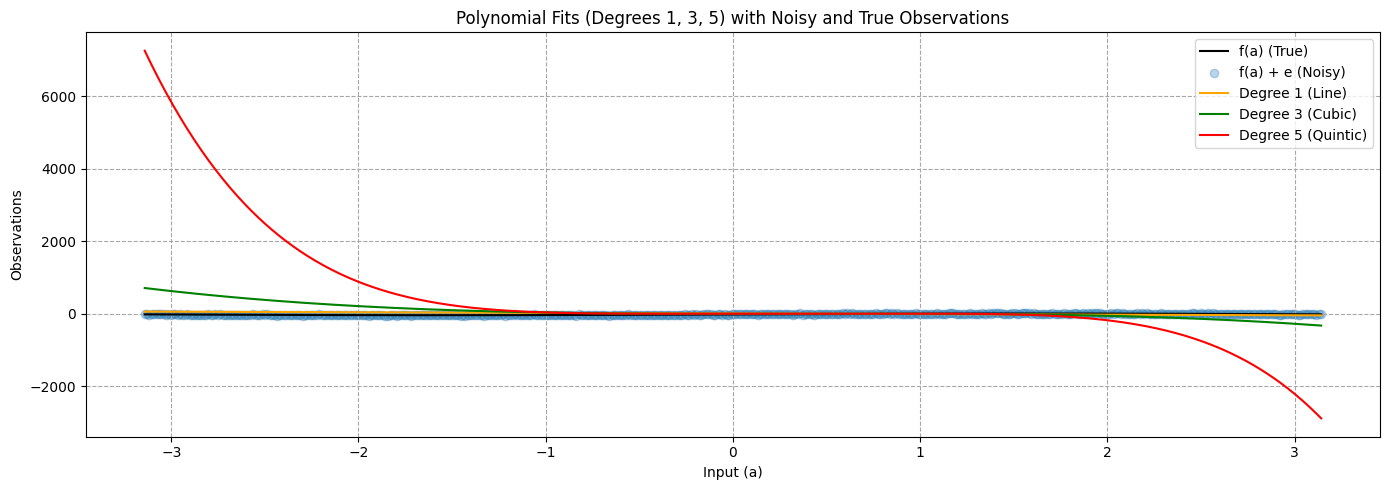

In [86]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

# Create a plot with true observations, noisy observations, and polynomial fits
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.plot(a, l_true, label="f(a) (True)", color='k') # Plot true observations (l_true) in black
ax.scatter(a, l, label="f(a) + e (Noisy)", color='tab:blue', marker='o', alpha=0.3) # Scatter plot of noisy observations (l) in blue

#polynomial fits
ax.plot(a, line_uw, label="Degree 1 (Line)", color='orange')
ax.plot(a, cubic_uw, label="Degree 3 (Cubic)", color='green')
ax.plot(a, quintic_uw, label="Degree 5 (Quintic)", color='red')

# Set axis labels, plot title and grid
ax.set_xlabel('Input (a)')
ax.set_ylabel('Observations')
ax.set_title('Polynomial Fits (Degrees 1, 3, 5) with Noisy and True Observations')
ax.grid(True, which='both', ls='--', color='0.65')
ax.legend() # Add a legend

# Adjust layout for tight spacing
fig.tight_layout()

Degree 1: Posterior Variance = 176.1034
Degree 3: Posterior Variance = 103.4266
Degree 5: Posterior Variance = 95.0819


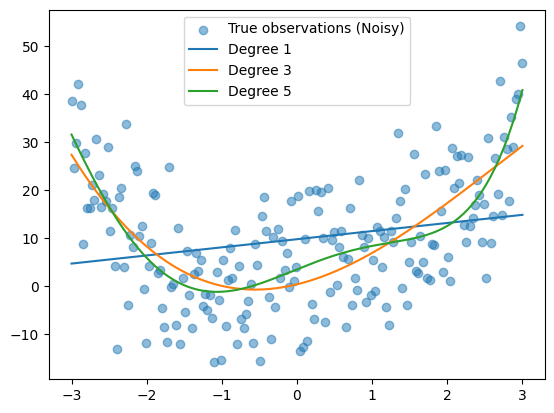

In [87]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
import numpy as np
import statsmodels.api as sm  # Make sure to import statsmodels
import matplotlib.pyplot as plt  # Add this import for plotting


#Generate example data (or use your own data)
np.random.seed(0)
X = np.linspace(-3, 3, 200)
y = 3 * X**2 + 2 * X + np.random.normal(0, 10, size=X.shape)  # Quadratic function with noise

# Function to calculate the posterior variance for each polynomial degree
def posterior_variance(X, y, degrees):
    variances = {}
    for degree in degrees:
        # Create polynomial features
        poly_features = np.vander(X, degree + 1)
        
        # Fit polynomial regression model
        model = sm.OLS(y, poly_features).fit()
        
        # Compute variance of the residuals (posterior variance)
        residuals = model.resid
        variance = np.var(residuals, ddof=len(model.params))  # ddof accounts for number of params
        variances[degree] = variance
        
        print(f"Degree {degree}: Posterior Variance = {variance:.4f}")
    
    return variances

# Specify the degrees of the polynomials you want to fit
degrees = [1,3,5]

# Calculate the posterior variance for each polynomial degree
variances = posterior_variance(X, y, degrees)

# Plot the polynomial fits for visualization (optional)
plt.scatter(X, y, label="True observations (Noisy)", alpha=0.5)

for degree in degrees:
    poly_features = np.vander(X, degree + 1)
    model = sm.OLS(y, poly_features).fit()
    y_pred = model.predict(poly_features)
    plt.plot(X, y_pred, label=f"Degree {degree}")

plt.legend()
plt.show()

Degree 1: L2 Norm = 115.6725
Degree 3: L2 Norm = 26.3638
Degree 5: L2 Norm = 50.2072


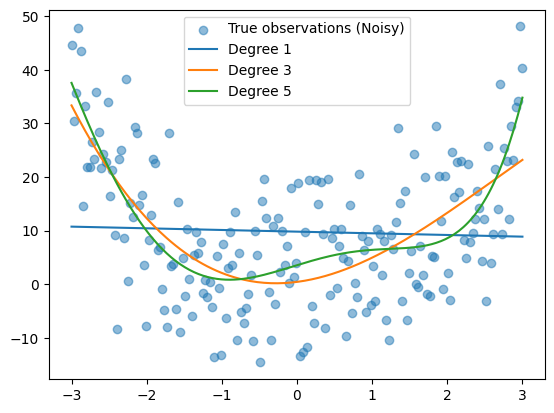

In [88]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate example data (or use your own data)
np.random.seed(0)
X = np.linspace(-3, 3, 200)
y_true = 3 * X**2  # True observations (without noise)
y_noisy = y_true + np.random.normal(0, 10, size=X.shape)  # Noisy observations

# Function to compute the L2 norm between predicted and true observations
def compute_norm(y_pred, y_true):
    return np.linalg.norm(y_pred - y_true)

# Fit polynomial regression and compute the norm for each degree
degrees = [1, 3, 5]
norms = {}

for degree in degrees:
    # Create polynomial features
    poly_features = np.vander(X, degree + 1)
    
    # Fit polynomial regression model
    model = sm.OLS(y_noisy, poly_features).fit()
    
    # Predict using the model
    y_pred = model.predict(poly_features)
    
    # Compute and print the L2 norm (Euclidean distance) between predicted and true observations
    norm_value = compute_norm(y_pred, y_true)
    norms[degree] = norm_value
    print(f"Degree {degree}: L2 Norm = {norm_value:.4f}")

# Optional: Plot the results for visualization
plt.scatter(X, y_noisy, label="True observations (Noisy)", alpha=0.5)

for degree in degrees:
    poly_features = np.vander(X, degree + 1)
    model = sm.OLS(y_noisy, poly_features).fit()
    y_pred = model.predict(poly_features)
    plt.plot(X, y_pred, label=f"Degree {degree}")

plt.legend()
plt.show()



In [89]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# 


In [90]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = #...

SyntaxError: invalid syntax (1336881142.py, line 5)

In [ ]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# ...


In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# ...

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

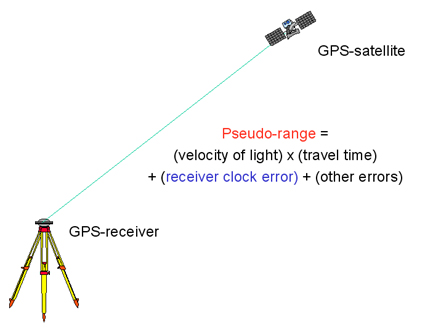

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [ ]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudoranges = pd.read_excel('pseudoranges.xlsx')
df_sat_pos = pd.read_excel('satellite_position.xlsx')

pseudoranges = df_pseudoranges.to_numpy()
sat_pos = df_sat_pos.to_numpy()

print(pseudoranges)
print(sat_pos)

In [201]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = pseudoranges.shape[0]
m = 3

In [202]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.eye(n)

In [203]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)

In [204]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])


In [205]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.zeros(m)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [206]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, sat_pos):
    difference = sat_pos - receiver_pos
    distance = np.sqrt(np.sum(difference ** 2, axis=1))
    return distance


In [207]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(receiver_pos, sat_pos, rho):
    difference = sat_pos - receiver_pos

    A = difference / rho[:, np.newaxis]

    return A

In [214]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)
convergence_criteria = np.linalg.norm(delta) < 0.001


max_iterations = 100

i = 0

delta = np.ones(3)
# Least Squares Estimation (LSE) function
while not convergence_criteria and i < max_iterations:

       # compute the geometric distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = euclidean_norm(x_hat, sat_pos[:, 1:4])

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(x_hat, sat_pos[:, 1:4], rho)

       # compute the misclosure array w
       # (1 marks)
       w = pseudoranges[:, 1] - rho

       # compute the corrections delta
       # (1 marks)
       delta = np.linalg.inv(A.T @ P @ A) @ (A.T @ P @ w)

       # update the states
       # (1 marks)
       x_hat += delta


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = x_hat - GroundTruth


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
       i += 1


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(w)
       arr_delta.append(delta)
       arr_err_pos.append(err_pos)
       arr_i.append(i)

       convergence_criteria = np.all(np.abs(delta) < 0.001)

       # After convergence, compute the A Posteriori Variance of Unit Weight
       # (1 marks)
       apv = (w.T @ P @ w) / (n - m)

       # compute the Covariance matrix of estimated states
       # (1 marks)
       C_x_hat = apv * np.linalg.inv(A.T @ P @ A)
       print(f"Iteration {i}: delta norm = {np.linalg.norm(delta)}")


In [236]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""

# (7 marks)
print("\nEstimated States (Receiver Position)", x_hat)
print(arr_delta)
print(arr_err_pos)
print ("\nCorrections Array (Delta)", delta)

print("\nEstimated Measurements Residuals (Misclosure):", w)  # Misclosure array

print("\nA Posteriori Variance of Unit Weight:", apv)  # A posteriori variance

print("\nCovariance Matrix of Estimated States:", C_x_hat)  # Covariance matrix of estimated states

print("\nNumber of Iterations:", i)  # Number of iterations

print("\n3-D Position Errors (Error from Ground Truth):", err_pos)  # Position error compared to ground truth


Estimated States (Receiver Position) [-1633491.76822453 -3651626.13394256  4952475.21438698]
[array([-1742926.82973031, -3643194.19155769,  4269785.04475251]), array([112399.83629558,  -2454.51329187, 673352.84618662]), array([-2965.13969719, -5976.97709088,  9334.51332501]), array([ 0.36490745, -0.4520019 ,  2.81012231]), array([-5.68264451e-08, -2.23400848e-07,  5.33752029e-07])]
[array([-109437.45005306,    8432.99094594, -682696.57479667]), array([ 2962.38624252,  5978.47765408, -9343.72861005]), array([-2.75345467,  1.5005632 , -9.21528504]), array([-2.38854722,  1.04856129, -6.40516273]), array([-2.38854728,  1.04856107, -6.4051622 ])]

Corrections Array (Delta) [1. 1. 1.]

Estimated Measurements Residuals (Misclosure): [ 3.82175379e+00 -1.66028602e+00  4.29356746e-01  1.56435721e-01
  3.61111910e+00  1.24503499e+00 -2.51530856e-03  2.20369535e+00
  8.90098736e-02  3.48029512e+00 -4.11836287e+00]

A Posteriori Variance of Unit Weight: 8.262379185699391

Covariance Matrix of Esti

In [221]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)
# The posterior variance of unit weight value is value indicates how well the observations fit the model after the least squares estimation.
# This value provides an estimate of the uncertainty associated with the measurements. 
# A value close to 1 suggests a good fit, while a value much larger than 1 indicates the model's variance may be underestimated or the data have outliers.
# Therefore, our computed value indicates that the model's varance is underestimated or may indicate the precesce of outliers in the data. 

# he covariance matrix provides insight into the uncertainty in the estimated receiver's position. 
# The diagonal elements represent the variances (i.e., uncertainties) in each coordinate (x, y, z), while off-diagonal elements represent correlations between the states. 
# Smaller values indicate higher confidence in the estimation.The Covariance matrix of estimated states indicates the degree of uncertainty in each state parameter and their correlations.
# Based off our values, the model has moderate or low reliability. The variances are high, especially for state 1 and 3. While state 2 has lower variance, all three states have values greater than 1,
# which may reflect issues with the model fit or measurements.

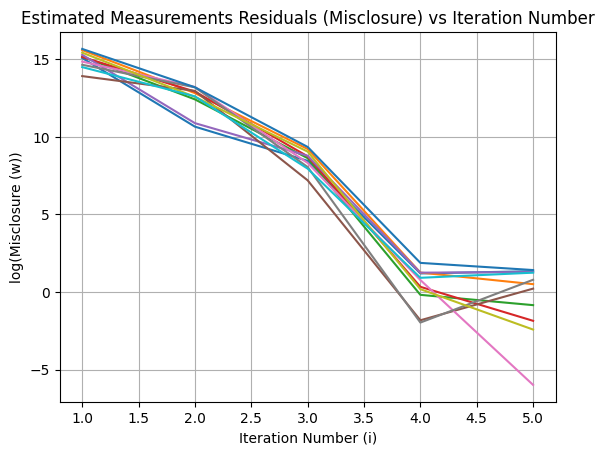

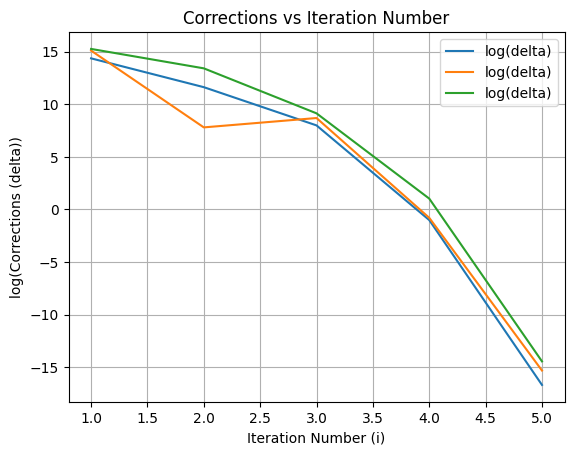

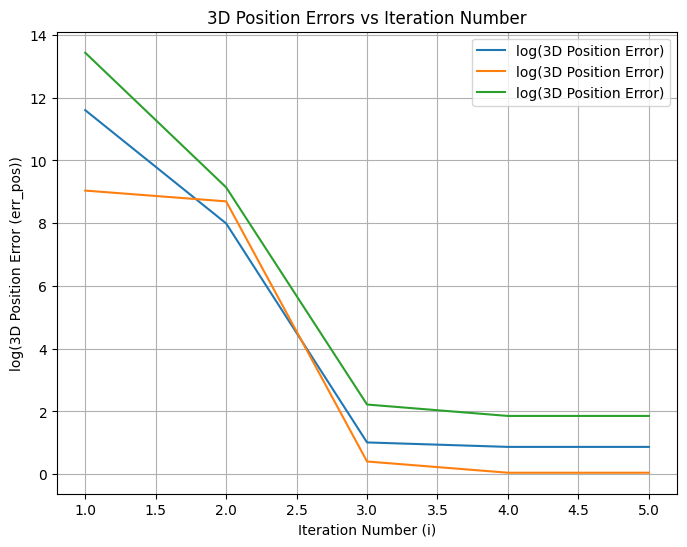

In [242]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.plot(arr_i, np.log(np.abs(arr_w)), label='log(w)')
plt.xlabel('Iteration Number (i)')
plt.ylabel('log(Misclosure (w))')
plt.title('Estimated Measurements Residuals (Misclosure) vs Iteration Number')
plt.grid(True)
plt.show()

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.plot(arr_i, np.log(np.abs(arr_delta)), label='log(delta)')
plt.xlabel('Iteration Number (i)')
plt.ylabel('log(Corrections (delta))')
plt.title('Corrections vs Iteration Number')
plt.legend()
plt.grid(True)
plt.show()

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(8, 6))
plt.plot(arr_i, np.log(np.abs(arr_err_pos)), label='log(3D Position Error)')
plt.xlabel('Iteration Number (i)')
plt.ylabel('log(3D Position Error (err_pos))')
plt.title('3D Position Errors vs Iteration Number')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

In [26]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
